<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/5_1_K_%ED%8F%89%EA%B7%A0_%EA%B5%B0%EC%A7%91%ED%99%94_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

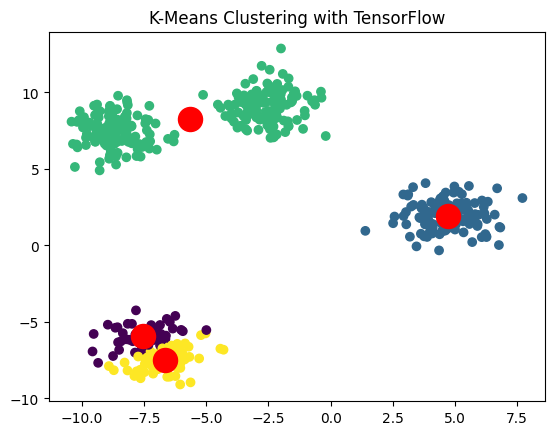

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 (예시: 2D 점들의 집합)
from sklearn.datasets import make_blobs
data, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# K-평균 알고리즘 구현

class KMeans:
    def __init__(self, k, max_iters=100):
        self.k = k
        self.max_iters = max_iters

    def fit(self, data):
        # 초기 중심을 데이터 포인트 중에서 랜덤하게 선택
        random_indices = np.random.choice(data.shape[0], self.k, replace=False)
        self.centroids = tf.Variable(data[random_indices], dtype=tf.float32) # Keep centroids as float32

        # Convert data to float32 to match centroids
        data = tf.cast(data, tf.float32)

        for i in range(self.max_iters):
            # 각 데이터 포인트에서 중심까지의 거리 계산
            distances = self._compute_distances(data)

            # 각 포인트를 가장 가까운 중심에 할당
            assignments = tf.argmin(distances, axis=1)

            # 새로운 중심 계산
            new_centroids = []
            for j in range(self.k):
                assigned_points = tf.boolean_mask(data, tf.equal(assignments, j))
                new_centroids.append(tf.reduce_mean(assigned_points, axis=0))
            new_centroids = tf.stack(new_centroids)

            # 중심이 변하지 않으면 종료
            if tf.reduce_all(tf.equal(new_centroids, self.centroids)):
                break

            self.centroids.assign(new_centroids)

    def _compute_distances(self, data):
        # 각 중심과 모든 데이터 포인트 간의 거리 계산
        expanded_data = tf.expand_dims(data, 1)
        expanded_centroids = tf.expand_dims(self.centroids, 0)
        distances = tf.reduce_sum(tf.square(expanded_data - expanded_centroids), axis=2)
        return distances

    def predict(self, data):
        # Convert data to float32 for consistency
        data = tf.cast(data, tf.float32)
        distances = self._compute_distances(data)
        return tf.argmin(distances, axis=1)

# K-평균 실행
kmeans = KMeans(k=4)
kmeans.fit(data)
predictions = kmeans.predict(data)

# 결과 시각화
plt.scatter(data[:, 0], data[:, 1], c=predictions, cmap='viridis')
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], s=300, c='red')
plt.title('K-Means Clustering with TensorFlow')
plt.show()
